## <b>Month 03 - Project 01</b>
### Build an <b>Artificial Neural Network (ANN)</b> architecture for handwritten number classification, using the MNIST dataset, which contains images of handwritten digits (0-9). The objective is to create a neural network that can accurately classify these digits.

In [45]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import warnings
warnings.filterwarnings("ignore")

## Loading and Preparing the Dataset

In [4]:
# Loading the Dataset
mnist_train_dataset = pd.read_csv('..\\Datasets\\MNIST Dataset\\MNIST_train.csv')
mnist_test_dataset = pd.read_csv('..\\Datasets\\MNIST Dataset\\MNIST_test.csv')

print('Shape of training data:', mnist_train_dataset.shape)
print('Shape of test data:', mnist_test_dataset.shape)

Shape of training data: (60000, 785)
Shape of test data: (10000, 785)


- The dataset is in shape such that it has 785 columns. The first 784 columns represent the pixel values of 28x28 images (flattened into 1D array) and the last column represent the labels (digits 0-9) which is the target variable.

In [5]:
mnist_train_dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print('Training Dataset:', mnist_train_dataset.info(), '\n')
print('Testing Dataset:', mnist_test_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
Training Dataset: None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB
Testing Dataset: None


In [7]:
# Separating the features and target variable
X_train = mnist_train_dataset.drop('label', axis=1)
Y_train = mnist_train_dataset['label']

X_test = mnist_test_dataset.drop('label', axis=1)
Y_test = mnist_test_dataset['label']

print('Shape of training data:', X_train.shape)
print('Shape of training labels:', Y_train.shape)
print('Shape of test data:', X_test.shape)
print('Shape of testing labels:', Y_test.shape)

Shape of training data: (60000, 784)
Shape of training labels: (60000,)
Shape of test data: (10000, 784)
Shape of testing labels: (10000,)


## Plotting Labels

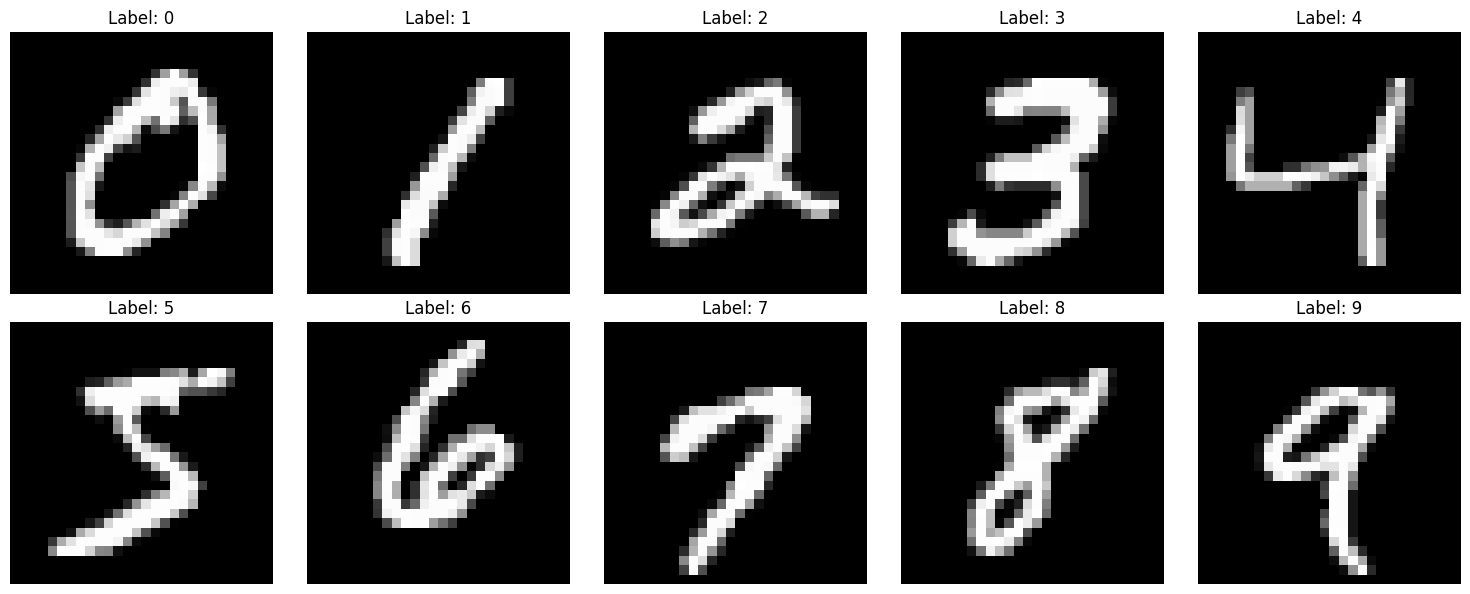

In [18]:
# Assume labels_to_find are the digits you want to find
labels_to_find = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
filtered_df = mnist_train_dataset[mnist_train_dataset['label'].isin(labels_to_find)]  # Find indexes of particular labels

indexes = filtered_df.groupby('label').apply(lambda x: x.index[0]).tolist()

# Create a 2x5 grid for displaying the images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()  # Flatten to easily iterate

# Plot the images
for i, index in enumerate(indexes):
    image = mnist_train_dataset.iloc[index, 1:].values.reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {mnist_train_dataset.iloc[index]["label"]}')
    axes[i].axis('off')  # Hide the axes

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Data Preprocessing

In [24]:
# Normalizing the data
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [25]:
# One-Hot encoding the labels
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

## Building the <b>ARTIFICIAL NUERAL NETWORK (ANN)</b> Model

In [27]:
# Building the model
ANN_model = Sequential()

# Input layer (no need to reshape data as it is already flattened)
ANN_model.add(Dense(128, activation='relu', input_shape=(784,)))
ANN_model.add(Dropout(0.2))

# Hidden Layers
ANN_model.add(Dense(128, activation='relu'))   # One hidden layer
ANN_model.add(Dropout(0.2))

# Output layer
ANN_model.add(Dense(10, activation='softmax'))

In [28]:
# Printing summary of model
ANN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Compiling the model
ANN_model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [31]:
# Training the model
history = ANN_model.fit(X_train, Y_train, 
                        epochs=10, 
                        validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8042 - loss: 0.6774 - val_accuracy: 0.9445 - val_loss: 0.1836
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9431 - loss: 0.1897 - val_accuracy: 0.9637 - val_loss: 0.1195
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9594 - loss: 0.1380 - val_accuracy: 0.9698 - val_loss: 0.0970
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9669 - loss: 0.1060 - val_accuracy: 0.9721 - val_loss: 0.0871
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9719 - loss: 0.0901 - val_accuracy: 0.9757 - val_loss: 0.0790
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9752 - loss: 0.0809 - val_accuracy: 0.9763 - val_loss: 0.0760
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9782 - loss: 0.0702 - val_accuracy: 0.9788 - val_loss: 0.0695
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9801 - loss: 0.0

In [32]:
# Evaluating the model
loss, accuracy = ANN_model.evaluate(X_test, Y_test)

print(f'Loss: {loss: .3f}')
print(f'Accuracy: {accuracy: .3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9741 - loss: 0.0801
Loss:  0.067
Accuracy:  0.978


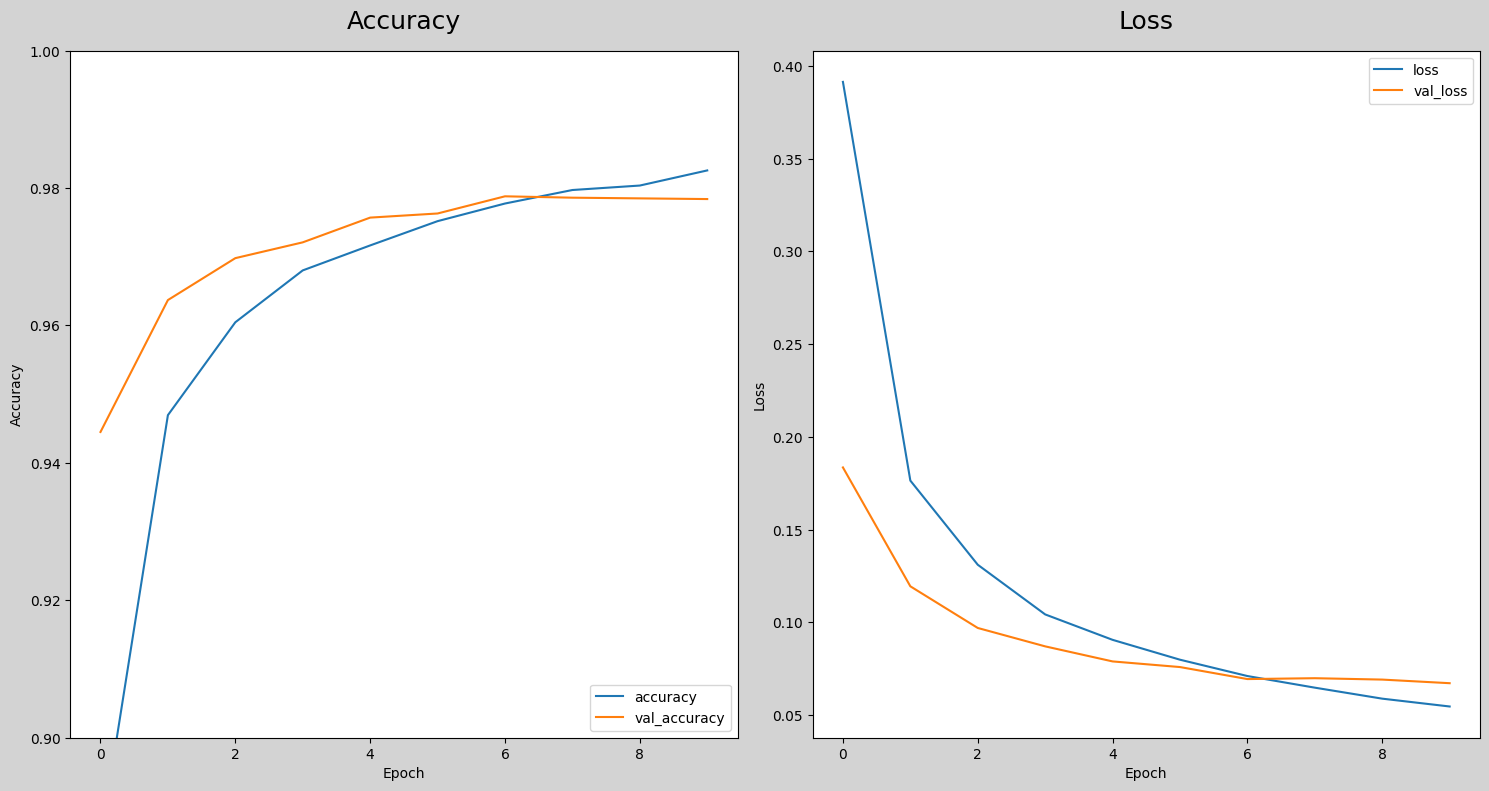

In [43]:
# Plot accuracy
plt.figure(figsize=(15, 8), facecolor='lightgray')
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy', fontsize=18, y=1.02)
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss', fontsize=18, y=1.02)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

#### <b>Accuracy vs. Epoch</b>
<p><b>Blue Line (Training Accuracy):</b> This line represents how the accuracy of the model on the training data improves over the epochs. It starts lower and increases as the number of epochs increases, showing that the model is learning from the training data. <br>
<b>Orange Line (Validation Accuracy):</b> This line represents how the model performs on unseen data (validation set). It typically starts higher than the training accuracy in the first few epochs and then follows a similar trend, converging around a certain value. <br>

<b>Observations:</b> The accuracy for both training and validation improves as the epochs progress.
The training accuracy increases steadily and slightly outperforms the validation accuracy.
The validation accuracy also increases but starts to plateau earlier than the training accuracy. This can be a sign that the model is reaching its optimal performance, or it could indicate the beginning of overfitting if it diverges from the training accuracy in further epochs.</p>

#### <b>Loss vs. Epoch</b>
<b>Blue Line (Training Loss):</b> This line shows the decrease in the loss on the training data as the model learns. Loss represents the error the model is making in its predictions, so a decrease in loss over epochs indicates that the model is improving. <br>
<b>Orange Line (Validation Loss):</b> This shows how well the model performs on unseen data. Initially, the validation loss decreases as the model learns, but eventually, it may start to flatten or even increase, signaling potential overfitting. <br>

<b>Observations:</b> The training loss decreases steadily over time, indicating that the model is learning from the data and reducing its errors.
The validation loss also decreases but at a slower rate, and it seems to plateau toward the end, which is a common scenario when the model starts to fit the training data well but may not generalize as well to unseen data.

## Making Prediction

In [44]:
# Predicting the target variable
prediction = ANN_model.predict([X_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [47]:
# Making a prediction for single image
print('Prediction:', np.argmax(prediction[90]))

Prediction: 3


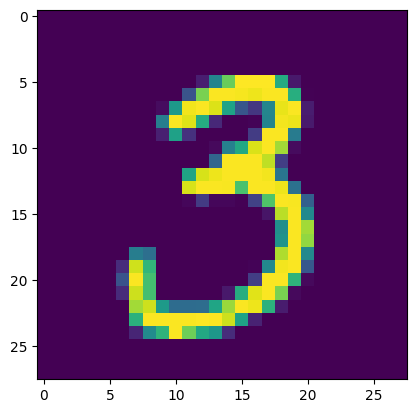

In [48]:
plt.imshow(X_test[90].reshape(28, 28))
plt.show()

- So we can see that our model is pretty accurate, which is a good sign.

<hr>